In [1]:
import pandas as pd
df=pd.read_csv("/content/sample_data/train.csv")
df

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


<ipython-input-2-10b7beae2291>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Basic_Demos-Sex", y="sii", data=filtered_data, palette="viridis")


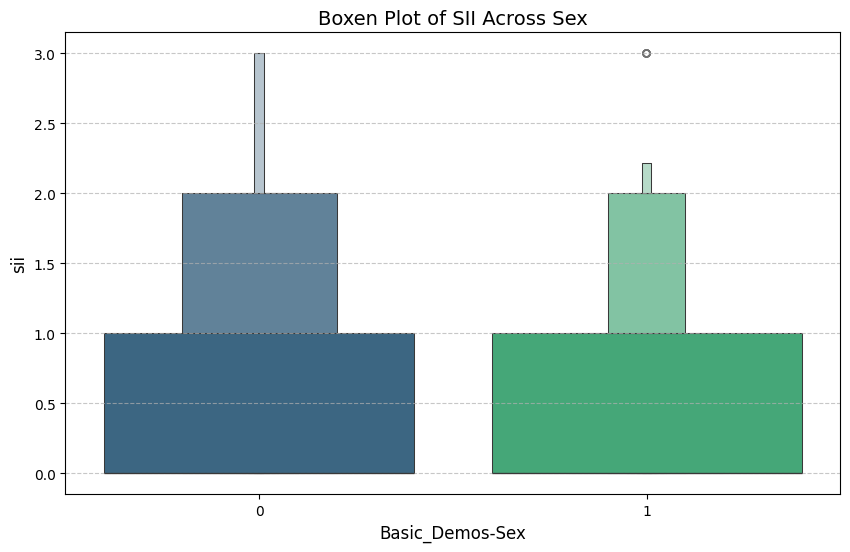

0-Male, 1-Female


,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Sex,,,,,,,,
0,1739.0,0.638873,0.798882,0.0,0.0,0.0,1.0,3.0
1,997.0,0.478435,0.709082,0.0,0.0,0.0,1.0,3.0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = df.dropna(subset=["Basic_Demos-Sex", "sii"])

plt.figure(figsize=(10, 6))
sns.boxenplot(x="Basic_Demos-Sex", y="sii", data=filtered_data, palette="viridis")

plt.title("Boxen Plot of SII Across Sex", fontsize=14)
plt.xlabel("Basic_Demos-Sex", fontsize=12)
plt.ylabel("sii", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


insights = filtered_data.groupby("Basic_Demos-Sex")["sii"].describe()
print("0-Male, 1-Female")
insights



The median and mean SII value for males is higher than that for females, indicating that males generally have higher SII values.

Males have a broader range of SII values compared to females, as seen by the larger spread of the boxen plot for males and the standard deviation. This suggests more variability in SII values for males.

The plot shows that females have a higher concentration of lower SII values, with fewer females in the higher ranges. Males, on the other hand, show more representation across the higher SII value ranges.


In [3]:
df["Basic_Demos-Age"].value_counts().groupby(lambda x: x // 10).sum()

,count
Basic_Demos-Age,
0,1874
1,2025
2,61


The data for the 20-29 age group(2) is significantly smaller compared to the 0-9 and 10-19 age groups (0) and (1). This data imbalance can have implications for analysis and insights.

<ipython-input-4-f9e42508ccf9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Basic_Demos-Age", y="sii", data=filtered_data, alpha=0.6, palette="viridis")


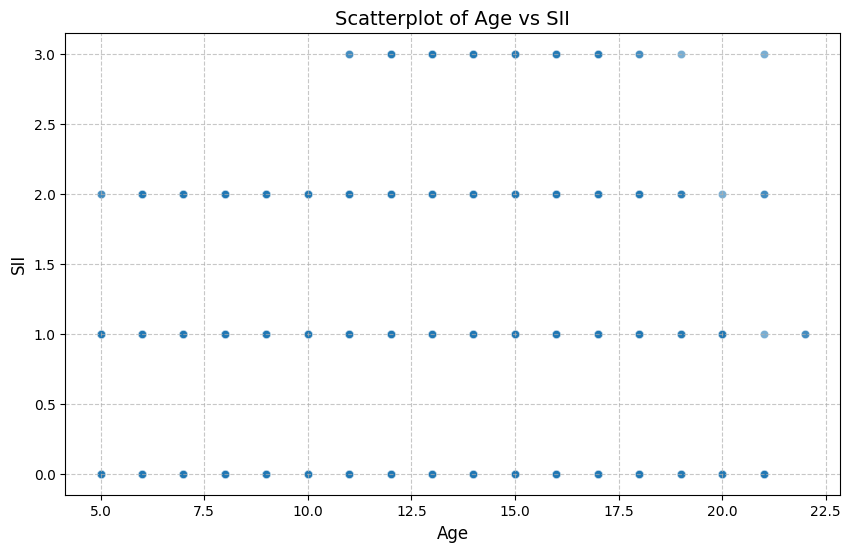

In [4]:

# Create a scatter plot to visualize the relationship between Age and SII
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Basic_Demos-Age", y="sii", data=filtered_data, alpha=0.6, palette="viridis")

# Add titles and labels for clarity
plt.title("Scatterplot of Age vs SII", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("SII", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


The highest SII value (3) appears most frequently in the 10-19 age group.This suggests that adolescents are more likely to exhibit the highest levels of SII.
This could point to behavioral or environmental factors associated with adolescence that influence this metric.



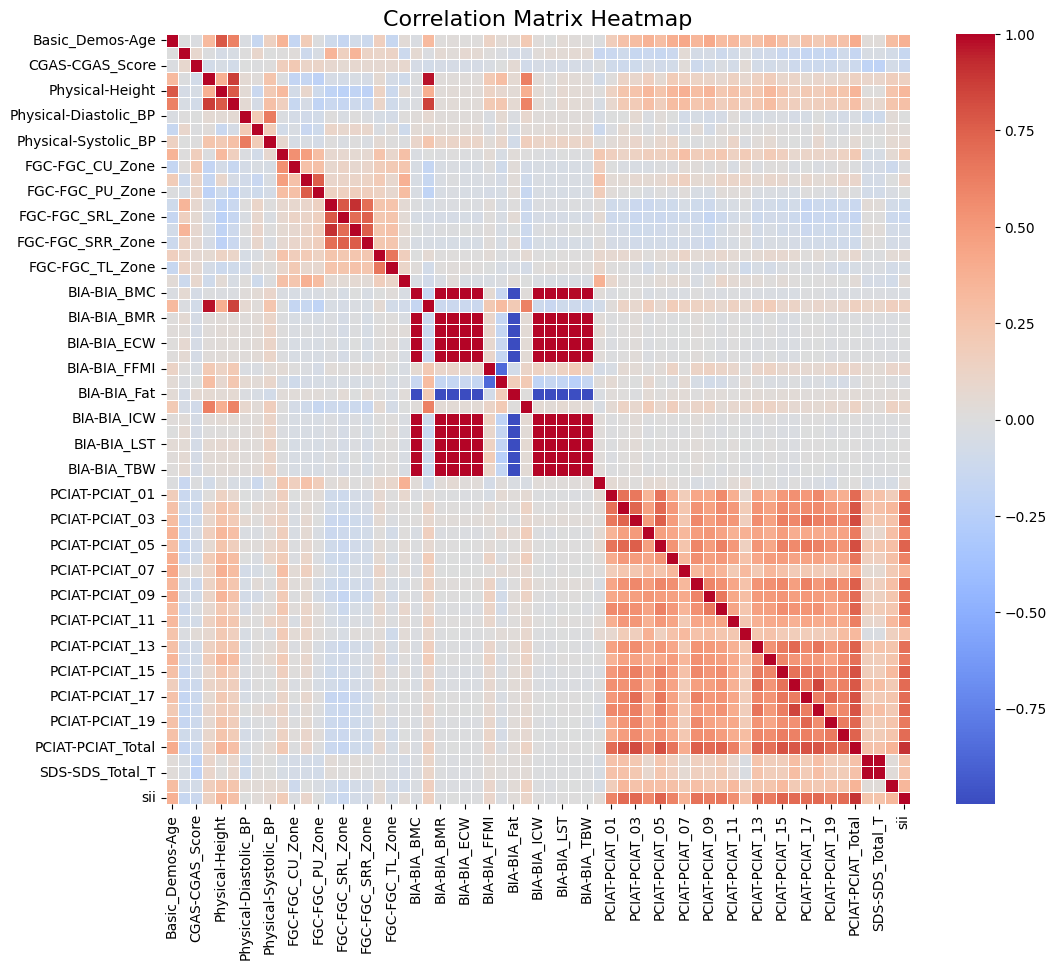

In [5]:
threshold = 0.7
filtered_numerical_data = df.select_dtypes(include=["float64", "int64"])
filtered_numerical_data = filtered_numerical_data.loc[
    :, filtered_numerical_data.isnull().mean() <= threshold
]

cleaned_data = filtered_numerical_data.dropna()
correlation_matrix = cleaned_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    cbar=True,
)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


PCIAT-Related Columns are highly positively correlated with SII.
Many PCIAT-related features are strongly inter-correlated, indicating they likely measure similar underlying constructs.

Higher scores on CGAS may correspond to lower SII, hinting at potential inverse behavioral or psychological factors.

Physical Features show weak or negligible correlation with SII, suggesting minimal physical impact on this measure.
